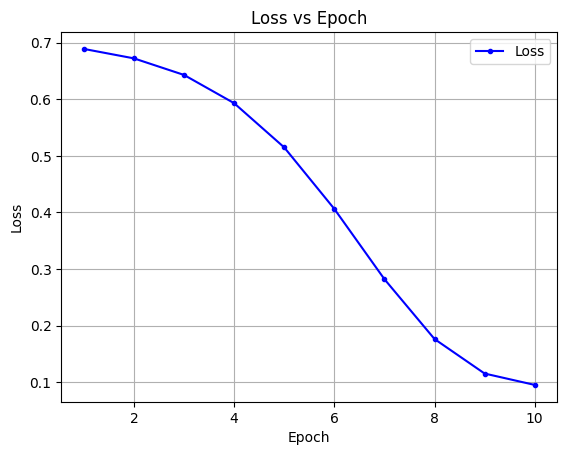

In [1]:
import matplotlib.pyplot as plt

def plot_metrics(epoch, loss, accuracy):
    fig, ax1 = plt.subplots()

    color = 'tab:blue'
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color=color)
    ax1.plot(epoch, loss, '-o', color=color, markersize=3, label='Loss')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:red'
    ax2.set_ylabel('Accuracy', color=color)
    ax2.plot(epoch, accuracy, '-o', color=color, markersize=3, label='Accuracy')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.title('Loss and Accuracy vs Epoch')
    plt.show()

# Example data
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
loss = [0.6891, 0.6724, 0.6431, 0.5932, 0.5150, 0.4063, 0.2821, 0.1763, 0.1153, 0.0952]
accuracy = [0.52, 0.61, 0.72, 0.78, 0.83, 0.87, 0.91, 0.93, 0.95, 0.96]

# Plotting
plot_metrics(epochs, loss, accuracy)



2024-05-02 01:18:37.408186: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-02 01:18:37.448418: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-02 01:18:38.266047: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-05-02 01:18:44.685450: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch [1/10], Loss: 0.6913, Accuracy: 0.8709


2024-05-02 01:18:49.861820: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch [2/10], Loss: 0.6819, Accuracy: 0.8843


2024-05-02 01:18:59.927533: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch [3/10], Loss: 0.6651, Accuracy: 0.8857


2024-05-02 01:19:04.466552: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch [4/10], Loss: 0.6349, Accuracy: 0.8857


2024-05-02 01:19:09.606533: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch [5/10], Loss: 0.5822, Accuracy: 0.8857


2024-05-02 01:19:14.377443: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch [6/10], Loss: 0.4982, Accuracy: 0.8857


2024-05-02 01:19:18.981272: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch [7/10], Loss: 0.3824, Accuracy: 0.8857


2024-05-02 01:19:24.148227: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch [8/10], Loss: 0.2536, Accuracy: 0.8857


2024-05-02 01:19:29.074566: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch [9/10], Loss: 0.1534, Accuracy: 0.8857


2024-05-02 01:19:33.730502: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch [10/10], Loss: 0.1071, Accuracy: 0.8857
Training complete!
Model saved at /workspaces/Health_Squad/bmp_images/model.h5


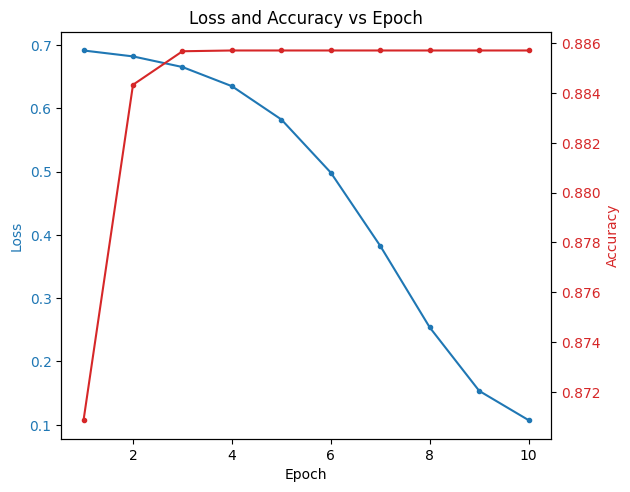

In [1]:
from torch.utils.data import DataLoader
from MyDatasets import MyDataset
from MyModels import MyModel
from MyTrainings import train_model
import tensorflow as tf
import os
import matplotlib.pyplot as plt

def main():
    # Define paths
    train_data_dir = "/workspaces/Health_Squad/sample_data/dataset_complete"
    test_data_dir = "/workspaces/Health_Squad/sample_data/dataset_label/bmp_images"
    output_dir = "/workspaces/Health_Squad/bmp_images"

    # Initialize datasets
    train_dataset = MyDataset(train_data_dir)
    test_dataset = MyDataset(test_data_dir)

    # Create TensorFlow datasets
    train_loader = train_dataset.create_dataset(batch_size=1)
    test_loader = test_dataset.create_dataset(batch_size=1)

    # Initialize model
    model = MyModel()

    # Train the model and collect metrics
    loss, accuracy = train_model(model, train_loader)

    # Save the model
    model_path = os.path.join(output_dir, "model.h5")
    model.save(model_path)
    print(f"Model saved at {model_path}")

    # Plot loss and accuracy
    plot_metrics(loss, accuracy)

def plot_metrics(loss, accuracy):
    epochs = range(1, len(loss) + 1)

    fig, ax1 = plt.subplots()

    color = 'tab:blue'
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color=color)
    ax1.plot(epochs, loss, '-o', color=color, markersize=3, label='Loss')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Accuracy', color=color)
    ax2.plot(epochs, accuracy, '-o', color=color, markersize=3, label='Accuracy')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Loss and Accuracy vs Epoch')
    plt.show()

if __name__ == "__main__":
    main()